### Methods
#### Understanding the data: 
I started by using the pandas library to read in my csv file. By utilizing the ```.index()``` and ```.columns()``` I was able to see the number of rows and columns in my dataframe.

I then used the ```.head()``` method which is a method on a dataframe object and passed in the number 10 so I can just see the first 10 rows of data.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("./data/mock_app_data.csv") 

#returns number of rows
print("num of rows: ", len(df.index))

#returns number of columns
print("num of columns: ", len(df. columns))

#returns first 10 rows with header
df.head(10)

num of rows:  1000
num of columns:  11


,id,first_name,last_name,email,gender,street_address,city,state,date_applied,progession,income
0,1000,Ewan,Markovich,emarkovich0@csmonitor.com,Male,6 Brickson Park Place,Columbus,Ohio,05/28/2016,Senior Sales Associate,44951.0
1,1001,Darcee,Shardlow,dshardlow1@live.com,Female,40977 Hanover Parkway,Lancaster,Pennsylvania,07/04/2016,Physical Therapy Assistant,42699.0
2,1002,Matt,Swancott,mswancott2@npr.org,Male,514 6th Junction,Omaha,Nebraska,12/15/2017,Media Manager I,74225.0
3,1003,Meade,Hillin,mhillin3@nationalgeographic.com,Male,2639 Cardinal Street,Riverside,California,09/27/2017,Research Assistant III,53885.0
4,1004,Leese,Garahan,lgarahan4@sphinn.com,Female,66 Blue Bill Park Pass,Las Vegas,Nevada,01/20/2016,Sales Associate,50149.0
5,1005,Gwendolen,Palia,gpalia5@patch.com,Female,507 Anzinger Place,Chicago,Illinois,04/28/2016,VP Quality Control,71921.0
6,1006,Horten,Hickford,hhickford6@discuz.net,Male,42586 Rockefeller Alley,Fort Smith,Arkansas,12/10/2017,Software Test Engineer III,72968.0
7,1007,Theodor,MacCallum,tmaccallum7@shutterfly.com,Male,064 Cottonwood Place,Saint Louis,Missouri,06/10/2017,Safety Technician I,40023.0
8,1008,Hedda,Finkle,hfinkle8@cbc.ca,Female,7 Bowman Lane,Houston,Texas,06/04/2016,Budget/Accounting Analyst I,69307.0
9,1009,Huntlee,Poles,hpoles9@geocities.com,Male,174 Ramsey Pass,Atlanta,Georgia,02/15/2017,Account Representative III,60884.0


### Data Exploration

Using the ```.describe()``` function I was able to see the count, mean, standard deviation (std), min, quartiles and max in its output. We will ignore the id column since it's just an application id and we don't need to do any analysis on it. 

We can see from the output that there are rows in the income column is missing 55 values since the file has 1000 rows and count returned 945.

Using ```df['female'].value_counts()``` function we can determine how many applicants were male and how many were female. From this I can determine that there are 44 missing records from gender by adding both counts together and subtracting from the total row count.

In [9]:
df.describe()

,id,income
count,1000.000000,945.000000
mean,1499.500000,54601.469841
std,288.819436,11397.859584
min,1000.000000,35040.000000
25%,1249.750000,44827.000000
50%,1499.500000,54309.000000
75%,1749.250000,64599.000000
max,1999.000000,74953.000000


In [11]:
df['gender'].value_counts()

Male      499
Female    457
Name: gender, dtype: int64

### Structuring data into a meaningful format
Once I knew what kind of data I was working with. I now wanted to visualize it. 

I used ```.boxplot(column='income')``` to make a plot chart of the variance in applicant's income.

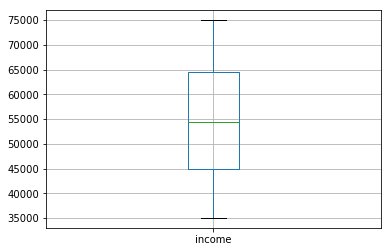

In [12]:
df.boxplot(column= 'income')

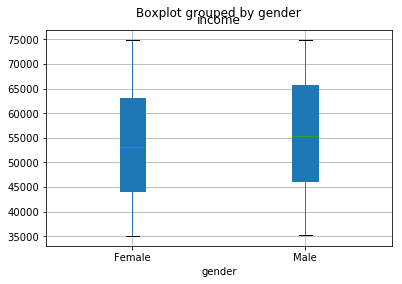

In [21]:
bp = df.boxplot(column='income', by = 'gender', patch_artist=True)

In [35]:
df.apply(lambda x: sum(x.isnull()),axis=0)

id                 0
first_name         0
last_name         75
email             44
gender            44
street_address     0
city               0
state              0
date_applied       0
progession         0
income            55
dtype: int64